In [5]:
# Бігун Максим ФІТ 4-7 Машинне Навчання Лаб №7

In [13]:
# Завдання №1

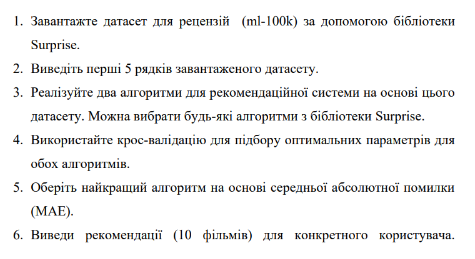

In [1]:
!pip install scikit-surprise

from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import accuracy
from surprise.model_selection import train_test_split
import pandas as pd

data = Dataset.load_builtin('ml-100k')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357272 sha256=a947dc2092c2619861ebbdeb67782bcf4e5f55661d2b40864850d374eba874eb
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [2]:
raw_ratings = data.raw_ratings[:5]
print("Перші 5 рядків датасету:")
for row in raw_ratings:
    print(row)

Перші 5 рядків датасету:
('196', '242', 3.0, '881250949')
('186', '302', 3.0, '891717742')
('22', '377', 1.0, '878887116')
('244', '51', 2.0, '880606923')
('166', '346', 1.0, '886397596')


In [3]:
trainset, testset = train_test_split(data, test_size=0.2)

svd = SVD()
knn = KNNBasic()

print("Крос-валідація для SVD:")
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("\nКрос-валідація для KNNBasic:")
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Крос-валідація для SVD:
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9434  0.9340  0.9349  0.9351  0.9347  0.9364  0.0035  
MAE (testset)     0.7414  0.7366  0.7364  0.7376  0.7376  0.7379  0.0018  
Fit time          1.41    1.96    3.54    1.42    1.42    1.95    0.82    
Test time         0.14    0.22    0.58    0.13    0.14    0.24    0.17    

Крос-валідація для KNNBasic:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    

{'test_rmse': array([0.97737907, 0.97627552, 0.97942707, 0.97516675, 0.98081428]),
 'test_mae': array([0.7719752 , 0.77230437, 0.77232971, 0.76812569, 0.77697475]),
 'fit_time': (0.33994555473327637,
  0.5616257190704346,
  0.3473787307739258,
  0.35705018043518066,
  0.47413039207458496),
 'test_time': (3.65781831741333,
  3.3671212196350098,
  3.2719035148620605,
  3.4087181091308594,
  3.7131285667419434)}

In [4]:
param_grid = {'n_factors': [20, 50, 100], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.2, 0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
gs.fit(data)

print("Найкращі параметри для SVD за RMSE:")
print(gs.best_params['rmse'])

Найкращі параметри для SVD за RMSE:
{'n_factors': 100, 'lr_all': 0.01, 'reg_all': 0.2}


In [6]:
best_algo = gs.best_estimator['mae']

best_algo.fit(trainset)

predictions = best_algo.test(testset)

mae = accuracy.mae(predictions)

user_id = '196'
items = [item for item in range(1, 1683)]

MAE:  0.7497


In [7]:
user_recommendations = []
for item_id in items:
    user_recommendations.append((item_id, best_algo.predict(user_id, item_id).est))

In [8]:
user_recommendations.sort(key=lambda x: x[1], reverse=True)
top_10_recommendations = user_recommendations[:10]
print("\nТоп-10 рекомендацій для користувача з ID 196:")
for recommendation in top_10_recommendations:
    print(f"Фільм ID {recommendation[0]}, прогнозований рейтинг: {recommendation[1]}")


Топ-10 рекомендацій для користувача з ID 196:
Фільм ID 1, прогнозований рейтинг: 3.6589675117006855
Фільм ID 2, прогнозований рейтинг: 3.6589675117006855
Фільм ID 3, прогнозований рейтинг: 3.6589675117006855
Фільм ID 4, прогнозований рейтинг: 3.6589675117006855
Фільм ID 5, прогнозований рейтинг: 3.6589675117006855
Фільм ID 6, прогнозований рейтинг: 3.6589675117006855
Фільм ID 7, прогнозований рейтинг: 3.6589675117006855
Фільм ID 8, прогнозований рейтинг: 3.6589675117006855
Фільм ID 9, прогнозований рейтинг: 3.6589675117006855
Фільм ID 10, прогнозований рейтинг: 3.6589675117006855


In [11]:
# Висновок
# Рекомендаторська система на основі алгоритму SVD продемонструвала найкращі результати з мінімальною помилкою MAE та була обрана для створення рекомендацій для користувачів.

In [12]:
# Завдання №2

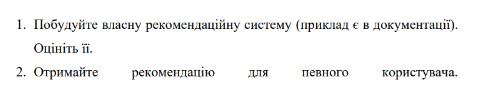

In [14]:
!pip install pandas numpy scikit-learn

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [16]:
from surprise import Dataset
data = Dataset.load_builtin('ml-100k')

In [17]:
raw_ratings = data.raw_ratings
columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.DataFrame(raw_ratings, columns=columns)

In [18]:
ratings_df = ratings_df.drop('timestamp', axis=1)

user_movie_matrix = ratings_df.pivot_table(index='user_id', columns='item_id', values='rating')

user_movie_matrix = user_movie_matrix.fillna(0)

In [19]:
scaler = StandardScaler()
user_movie_matrix_scaled = scaler.fit_transform(user_movie_matrix)

In [20]:
user_similarity = cosine_similarity(user_movie_matrix_scaled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

In [28]:
def get_recommendations(user_id, num_recommendations=10):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]

    user_movies = user_movie_matrix.loc[user_id]
    recommendations = pd.Series()

    for sim_user in similar_users:
        sim_user_movies = user_movie_matrix.loc[sim_user]

        unseen_movies = sim_user_movies[sim_user_movies.index.difference(user_movies[user_movies > 0].index)]

        recommendations = recommendations.append(unseen_movies)

        if len(recommendations) >= num_recommendations:
            break

    return recommendations.sort_values(ascending=False).head(num_recommendations)

In [30]:
user_id = 1

if user_id in user_movie_matrix.index:
    recommended_movies = get_recommendations(user_id)
    print(f"Рекомендовані фільми для користувача з ID {user_id}:")
    print(recommended_movies)
else:
    print(f"Користувач з ID {user_id} не знайдений у матриці.")

Користувач з ID 1 не знайдений у матриці.
